# Introduction to Qiskit
Updated to version 1.0 (Mars 2024)

Dans ce notebook nous allons lister les backends auquel nous avez acces. C'est un "provider" qui fournit l'accès aux services IBM Quantum disponibles pour un compte utilisateur.
La notion d'instance quand a elle gere le controle de ces access aux services IBM Quantum™ aux quels vous êtes affecté (par example une certaine liste de machines quantiques). 

# Actions to be performed from the quantum Lab or from your local Qiskit installation if any


In [ ]:
# Try some import from qiskit 
from qiskit import QuantumCircuit
from qiskit.quantum_info import gate_error
from qiskit.pulse.library import Gaussian, Pulse, Waveform


# Checking Qiskit version 

In [ ]:
import qiskit
import qiskit_ibm_provider as qp
import qiskit_ibm_runtime as qr

print("Qiskit Version :" ,qiskit.__version__ )
print("\nQiskit provider version :", qp.__version__ )
print("\nQiskit runtime version :", qr.__version__ )


# Setting up access to run devices


### Grab your API token from 
https://quantum.ibm.com/ 

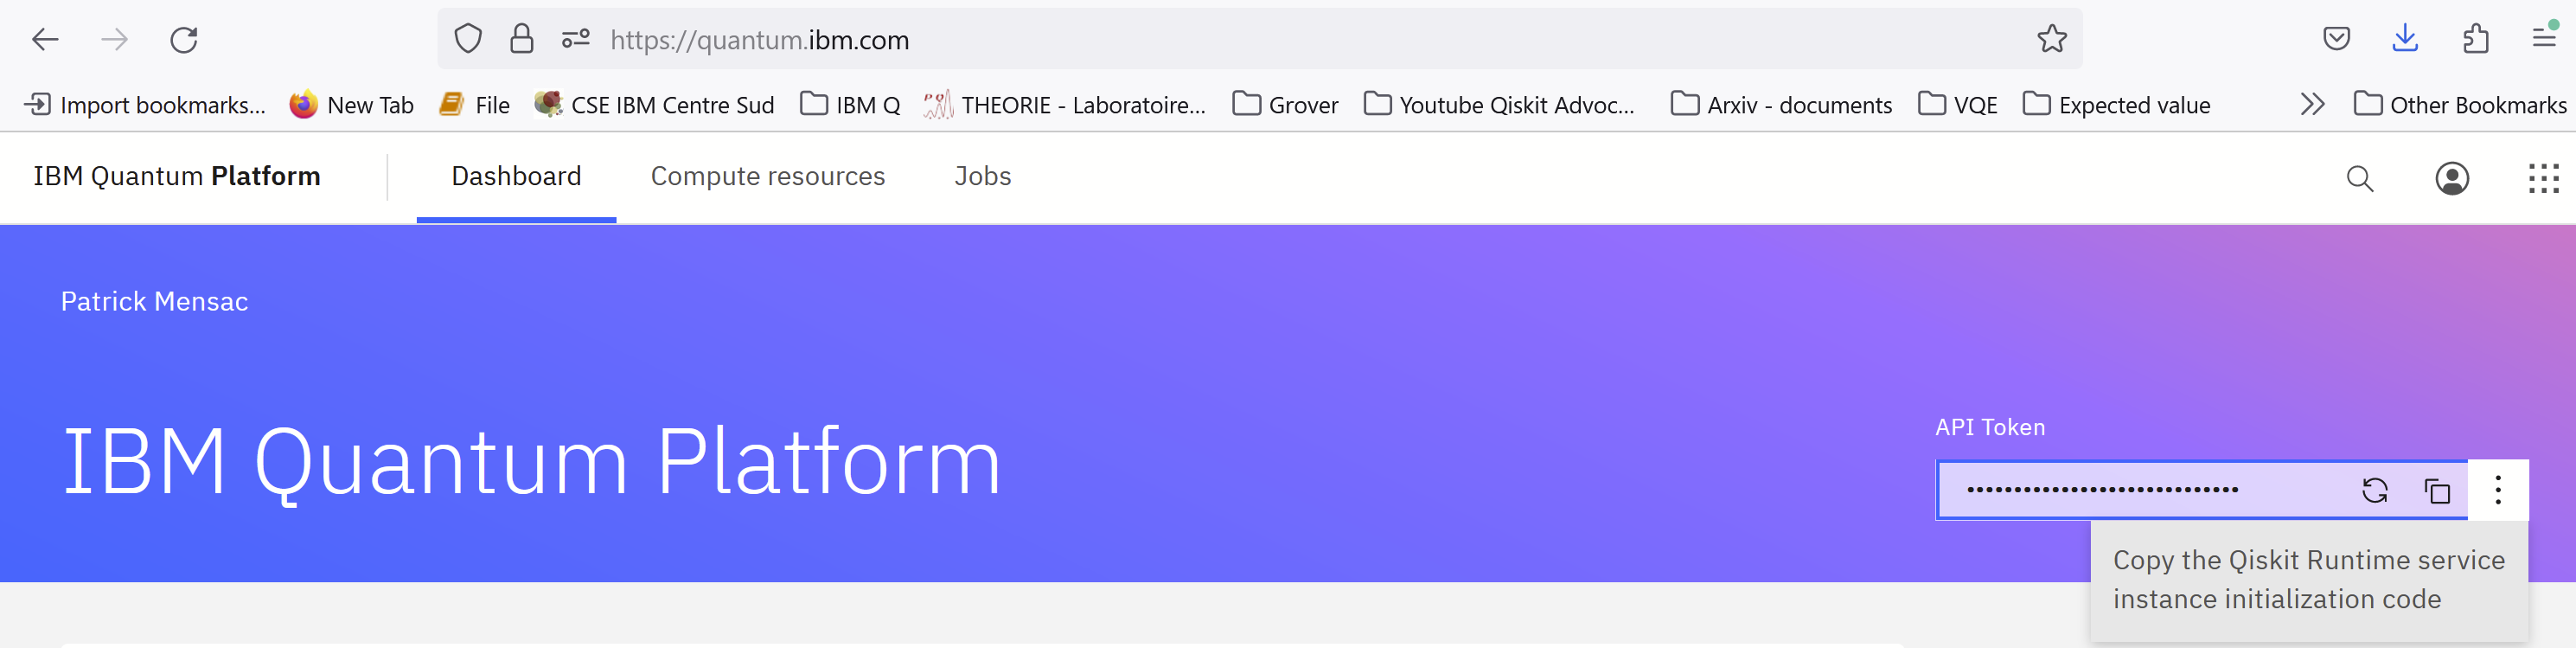

In [ ]:
# save your token to your local laptop 
from qiskit_ibm_provider import IBMProvider

API_TOKEN = '<Your Token>'
provider = IBMProvider(instance='ibm-q/open/main')
# provider.save_account(API_TOKEN, name='Mon provider name') 

# Using a provider

In [ ]:
# listing the provider you have access to 
provider.active_account()

# Backends for your provider

In [ ]:
# listing backends your provider have access to 
provider.backends()

# The least busy backend

In [ ]:
# Checking for the least busy backend 
from qiskit_ibm_provider import ibm_qubit_properties, least_busy

available_backends=provider.backends(simulator=False, operational=True)

lb_backend = least_busy(available_backends)

print('The least busy backend is: ', lb_backend)

# Using the least busy backend

In [ ]:
backend = least_busy(available_backends)
print("Selected the least busy backend: ", backend.name)

In [ ]:
# if you wanna use the least busy backend 
backend = provider.get_backend(backend.name)
print(backend)

### If you want to get the least busy backend among premium device with more than 16 qubits  

In [ ]:
# print only the real backends of your provider and those with a number of qubits greater than 1
# filter available backends without ibmq_armonk 

backends = list(filter(lambda device:device.configuration().num_qubits>20, available_backends))
print (backends)

In [ ]:
# using the least busy backend
lb_backend = least_busy(backends)    
print(lb_backend)

# Using a specific backend 

### If you want to use "ibm_brisbane" as backend 

In [ ]:
# Selecting a backend
backend = provider.get_backend('ibm_brisbane')  
backend.name

In [ ]:
# ploting the coupling map of the backend
from qiskit.visualization import plot_gate_map, gate_map
plot_gate_map(backend)

In [ ]:
gate_map.plot_error_map(backend)

In [ ]:
# List the backend properties 
backend.properties().to_dict()

In [ ]:
# list the backend configuration, the number of qubits, the topology ..etc.etc..
backend.configuration().to_dict()

In [ ]:
# List the different qubit characteristics and the pulses library  
backend.defaults().to_dict()